In [18]:
import json, os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

class DownstreamResult:
    def __init__(self, labelPath, resultPath, classes):
        self.labelPath, self.resultPath, self.classes = labelPath, resultPath, classes
        self.df = pd.read_csv(labelPath, header=None, delimiter=' ').rename(columns={0:"video",1:"GT"})
        self.df["video"] = self.df["video"].apply(lambda s:'/'.join(s.split('/')[-2:]))
        resultL = json.load(open(f"{resultPath}/result.json",'r'))
        resultL = [ max(zip(L,range(len(L)))) for L in resultL ]
        self.df['pred_cf'], self.df['pred_cls'] = zip(*resultL)
        self.right_df = self.df[ self.df["GT"]==self.df['pred_cls'] ].sort_values(by=["pred_cf"])
        self.wrong_df = self.df[ self.df["GT"]!=self.df['pred_cls'] ].sort_values(by=["pred_cf"])
        print(f"all={len(self.df)}, right={len(self.right_df)}, wrong={len(self.wrong_df)}, accuracy={round(len(self.right_df)/len(self.df),3)}")
        
    def get_dfs(self, right=False, wrong=False):
        print(f"self.right_df\n{self.right_df}") if right else None
        print(f"self.wrong_df\n{self.wrong_df}") if wrong else None
        
    def plotConfusion(self):
        classCountDict = self.df["GT"].value_counts().to_dict()
        print(f"classCountDict={classCountDict}")
        n = len(self.classes)
        M, R = np.zeros((n,n)), np.zeros((n,n))
        for i in range(len(self.df)):
            _, gt, _, pd = self.df.loc[i]
            M[gt][pd]+=1
            R[gt][pd]+=1/classCountDict[gt]
        R = np.round(R,3)
        P = np.round(M.copy()/M.sum(axis=0),3)
        plt.figure(figsize=(18,4))
        #
        plt.subplot(1,3,1)
        plt.title("Number", fontsize=14)
        plt.xlabel("PD")
        plt.ylabel("GT")
        plt.xticks(range(n),self.classes, fontsize=14)
        plt.yticks(range(n),self.classes, fontsize=14)
        plt.imshow(R, cmap=mpl.cm.Blues)
        plt.colorbar()
        for i in range(n):
            for j in range(n):
                plt.annotate(int(M[i][j]), xy=(j,i), ha="center", va="center", color="black" if R[i][j]<0.5 else "white", fontsize=14)
        #
        plt.subplot(1,3,2)
        plt.title("row normalized (recall)", fontsize=14)
        plt.xlabel("PD")
        plt.ylabel("GT")
        plt.xticks(range(n),self.classes, fontsize=14)
        plt.yticks(range(n),self.classes, fontsize=14)
        plt.imshow(R, cmap=mpl.cm.Blues)
        plt.colorbar()
        for i in range(n):
            for j in range(n):
                plt.annotate(R[i][j], xy=(j,i), ha="center", va="center", color="black" if R[i][j]<0.5 else "white", fontsize=14)
        #
        plt.subplot(1,3,3)
        plt.title("col normalized (precision)", fontsize=14)
        plt.xlabel("PD")
        plt.ylabel("GT")
        plt.xticks(range(n),self.classes, fontsize=14)
        plt.yticks(range(n),self.classes, fontsize=14)
        plt.imshow(P, cmap=mpl.cm.Blues)
        plt.colorbar()
        for i in range(n):
            for j in range(n):
                plt.annotate(P[i][j], xy=(j,i), ha="center", va="center", color="black" if P[i][j]<0.5 else "white", fontsize=14)
        plt.savefig(f"{self.resultPath}/confusion.jpg")
        plt.show()
        
    def getWrongVideos(self):
        os.makedirs(f"{self.resultPath}/wrong", exist_ok=True)
        for i in range(len(self.wrong_df)):
            video, _, _, pred_cls = self.wrong_df.iloc[i]
            srcPath = f"{os.path.dirname(self.labelPath)}/{video}"
            desPath = f"{self.resultPath}/wrong/{os.path.basename(video)}".replace(".mp4",f"_pd{pred_cls}.mp4")
            os.system(f"cp {srcPath} {desPath}")
            
    def getRightVideos(self):
        os.makedirs(f"{self.resultPath}/right", exist_ok=True)
        for i in range(len(self.right_df)):
            video, _, _, pred_cls = self.right_df.iloc[i]
            srcPath = f"{os.path.dirname(self.labelPath)}/{video}"
            desPath = f"{self.resultPath}/right/{os.path.basename(video)}".replace(".mp4",f"_pd{pred_cls}.mp4")
            os.system(f"cp {srcPath} {desPath}")

all=50, right=40, wrong=10, accuracy=0.8
classCountDict={3: 14, 1: 13, 4: 8, 0: 8, 2: 7}


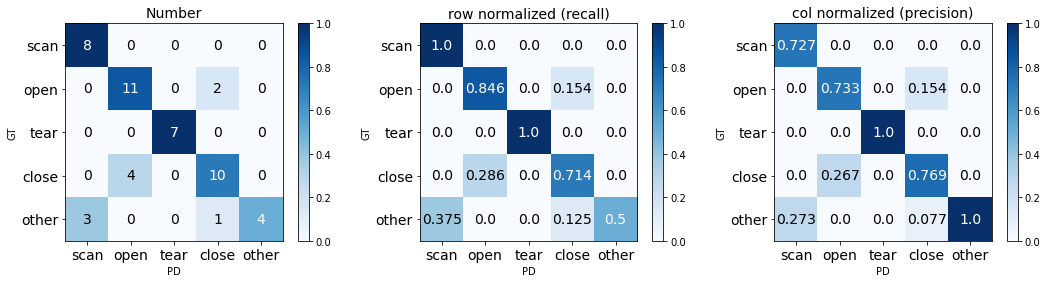

In [39]:
obj = DownstreamResult("../_data/downstream_0810_10/val.csv", "../_exps/downstream_0810_10_lr0", ["scan","open","tear","close","other"])
#obj.get_dfs(right=True, wrong=True)
obj.plotConfusion()
obj.getRightVideos()

all=50, right=44, wrong=6, accuracy=0.88
self.right_df
                                         video  GT   pred_cf  pred_cls
13   3_close/video_20220810082429_3_294.51.mp4   3  0.463867         3
30     3_close/video_20220810083429_3_6.94.mp4   3  0.464355         3
22    3_close/video_20220810083429_3_86.14.mp4   3  0.543945         3
40  4_others/video_20220810083930_4_118.71.mp4   4  0.549316         4
27   4_others/video_20220810084430_4_76.98.mp4   4  0.586914         4
48  4_others/video_20220810083429_4_102.99.mp4   4  0.597656         4
14    1_open/video_20220810083429_1_111.58.mp4   1  0.609863         1
7     3_close/video_20220810083429_3_85.71.mp4   3  0.620117         3
19   3_close/video_20220810082429_3_293.98.mp4   3  0.620117         3
6   4_others/video_20220810083930_4_233.66.mp4   4  0.624023         4
26  4_others/video_20220810084430_4_203.96.mp4   4  0.625488         4
45    3_close/video_20220810083930_3_60.16.mp4   3  0.660645         3
2     3_close/video_20

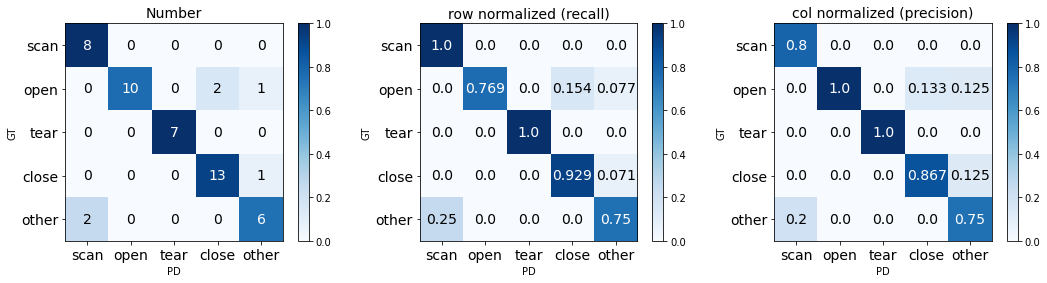

In [15]:
obj = DownstreamResult("../_data/downstream_0810_10/val.csv", "../_exps/downstream_0810_10_lr1", ["scan","open","tear","close","other"])
obj.get_dfs(right=True, wrong=True)
obj.plotConfusion()
obj.getWrongVideos()

all=50, right=44, wrong=6, accuracy=0.88
self.right_df
                                         video  GT   pred_cf  pred_cls
30     3_close/video_20220810083429_3_6.94.mp4   3  0.509277         3
40  4_others/video_20220810083930_4_118.71.mp4   4  0.611816         4
26  4_others/video_20220810084430_4_203.96.mp4   4  0.631348         4
22    3_close/video_20220810083429_3_86.14.mp4   3  0.644531         3
6   4_others/video_20220810083930_4_233.66.mp4   4  0.709473         4
25    1_open/video_20220810083429_1_278.56.mp4   1  0.713867         1
45    3_close/video_20220810083930_3_60.16.mp4   3  0.732910         3
27   4_others/video_20220810084430_4_76.98.mp4   4  0.737305         4
48  4_others/video_20220810083429_4_102.99.mp4   4  0.763184         4
19   3_close/video_20220810082429_3_293.98.mp4   3  0.764648         3
7     3_close/video_20220810083429_3_85.71.mp4   3  0.806152         3
3    3_close/video_20220810083930_3_253.71.mp4   3  0.835938         3
23     0_scan/video_20

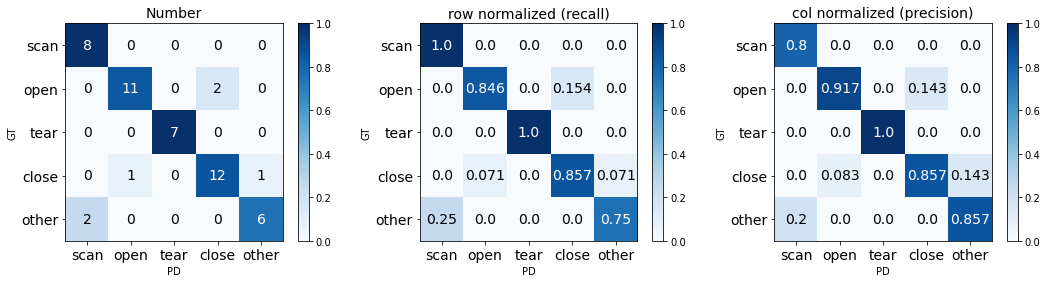

In [21]:
obj = DownstreamResult("../_data/downstream_0810_10/val.csv", "../_exps/downstream_0810_10_lr2", ["scan","open","tear","close","other"])
obj.get_dfs(right=True, wrong=True)
obj.plotConfusion()
obj.getWrongVideos()

all=50, right=48, wrong=2, accuracy=0.96
self.right_df
                                         video  GT   pred_cf  pred_cls
49   4_others/video_20220810083930_4_96.84.mp4   4  0.499268         4
26  4_others/video_20220810084430_4_203.96.mp4   4  0.663086         4
9     1_open/video_20220810084430_1_171.58.mp4   1  0.781738         1
23     0_scan/video_20220810084430_0_46.19.mp4   0  0.984863         0
40  4_others/video_20220810083930_4_118.71.mp4   4  0.985352         4
3    3_close/video_20220810083930_3_253.71.mp4   3  0.990723         3
13   3_close/video_20220810082429_3_294.51.mp4   3  0.991699         3
27   4_others/video_20220810084430_4_76.98.mp4   4  0.993652         4
44  4_others/video_20220810083429_4_264.28.mp4   4  0.994629         4
46    0_scan/video_20220810083429_0_160.11.mp4   0  0.995605         0
2     3_close/video_20220810083930_3_254.4.mp4   3  0.995605         3
6   4_others/video_20220810083930_4_233.66.mp4   4  0.996094         4
17   3_close/video_202

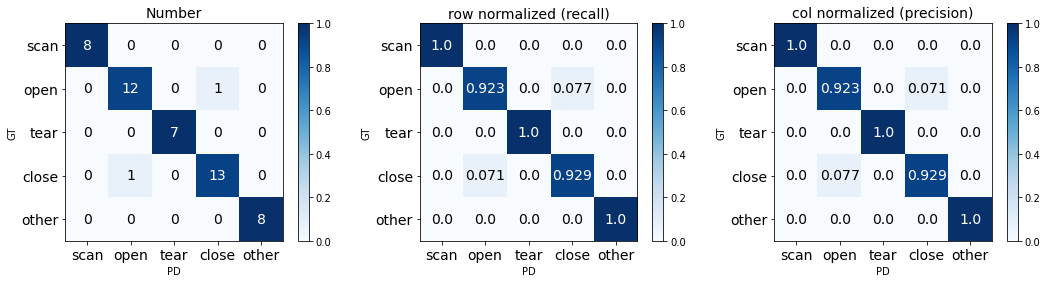

In [42]:
obj = DownstreamResult("../_data/downstream_0810_10/val.csv", "../_exps/downstream_0810_10_lr3", ["scan","open","tear","close","other"])
obj.get_dfs(right=True, wrong=True)
obj.plotConfusion()
obj.getWrongVideos()

all=50, right=48, wrong=2, accuracy=0.96
self.right_df
                                         video  GT   pred_cf  pred_cls
35    3_close/video_20220810083429_3_84.59.mp4   3  0.527344         3
9     1_open/video_20220810084430_1_171.58.mp4   1  0.572266         1
19   3_close/video_20220810082429_3_293.98.mp4   3  0.809082         3
49   4_others/video_20220810083930_4_96.84.mp4   4  0.855469         4
40  4_others/video_20220810083930_4_118.71.mp4   4  0.900879         4
22    3_close/video_20220810083429_3_86.14.mp4   3  0.958008         3
46    0_scan/video_20220810083429_0_160.11.mp4   0  0.967285         0
44  4_others/video_20220810083429_4_264.28.mp4   4  0.975098         4
17   3_close/video_20220810083930_3_254.99.mp4   3  0.975586         3
13   3_close/video_20220810082429_3_294.51.mp4   3  0.976074         3
3    3_close/video_20220810083930_3_253.71.mp4   3  0.984863         3
39     1_open/video_20220810083930_1_38.56.mp4   1  0.986328         1
6   4_others/video_202

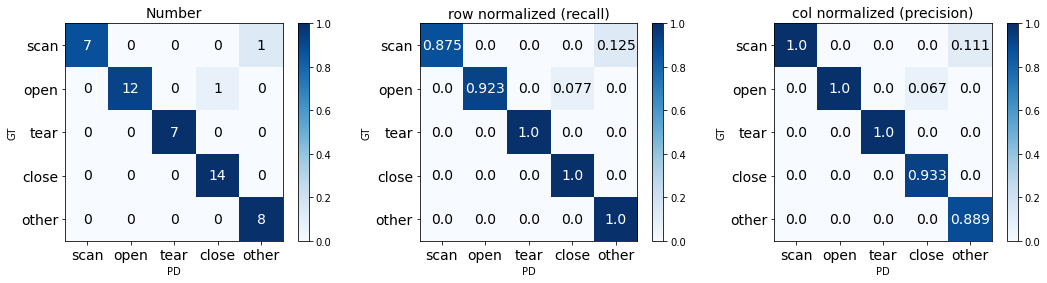

In [41]:
obj = DownstreamResult("../_data/downstream_0810_10/val.csv", "../_exps/downstream_0810_10_lr4", ["scan","open","tear","close","other"])
obj.get_dfs(right=True, wrong=True)
obj.plotConfusion()
obj.getWrongVideos()